# Time Series - ARIMA
## Created by Putri Bunga Rahmalita

## Data Description
Sales contains the quarterly sales for a small company over the period 1981–2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

## Load Data

In [3]:
dataset = pd.read_excel('Exercise1.xlsx')
data = pd.DataFrame(dataset)

In [4]:
data = data.drop(['AdBudget','GDP'],axis=1)

In [5]:
data.head()

,Sales
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


## Check Missing Value

In [110]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)
percentage_missing = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False)
print(percentage_missing)

Sales    0
dtype: int64
Sales    0.0
dtype: float64


## Data Visualization

### Box Plot

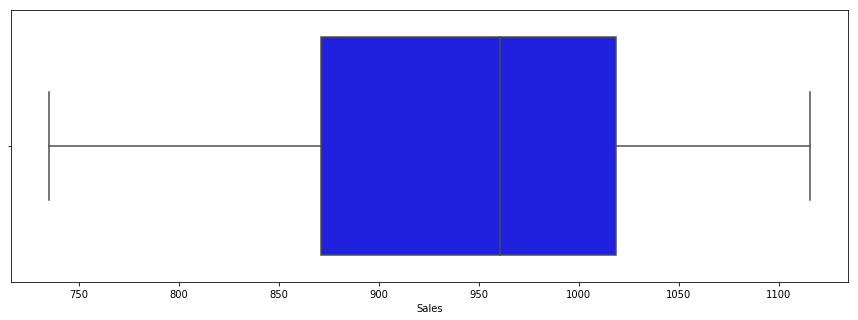

In [113]:
sns.boxplot(data['Sales'], color ='blue',orient = "h")

### Time Series Plot

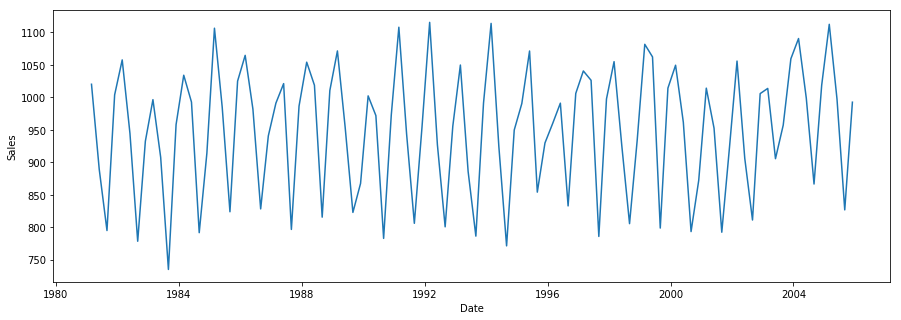

In [128]:
plt.xlabel("Date")
plt.ylabel("Sales")
plt.plot(data)

## Pola Addictive

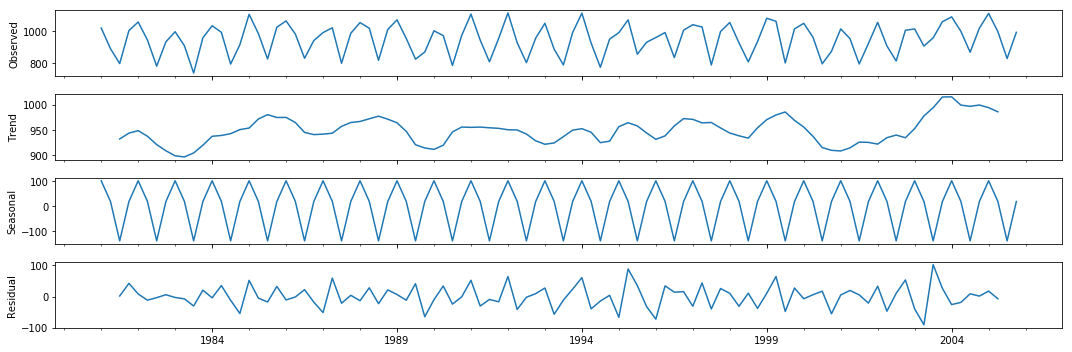

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='addictive')
fig = result.plot()

## Identify Stationarity

In [8]:
rolmean = data.rolling(window=12).mean()

rolstd = data.rolling(window=12).std()
print(rolmean, rolstd)

                 Sales
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01  942.791667
2001-06-01 

## Plot Rolling Statistics

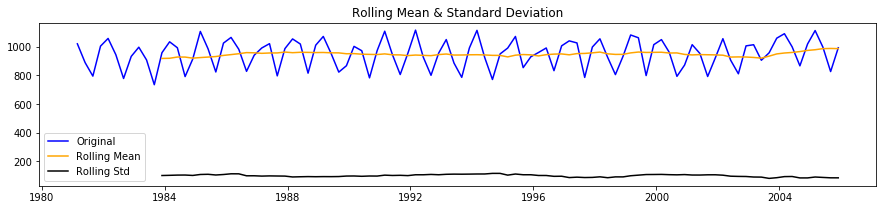

In [34]:
original = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='orange', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Perform Dickey-Fuller test

In [11]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


## Estimating trend

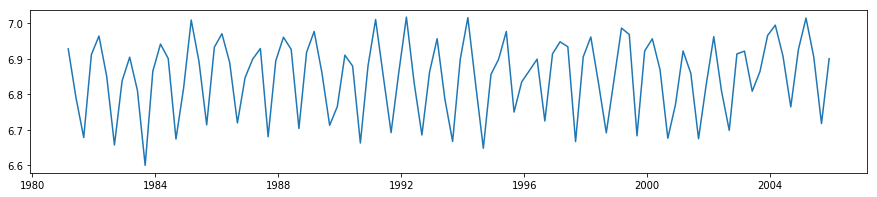

In [35]:
data_logScale = np.log(data)
plt.plot(data_logScale)

## To recognize stationarity

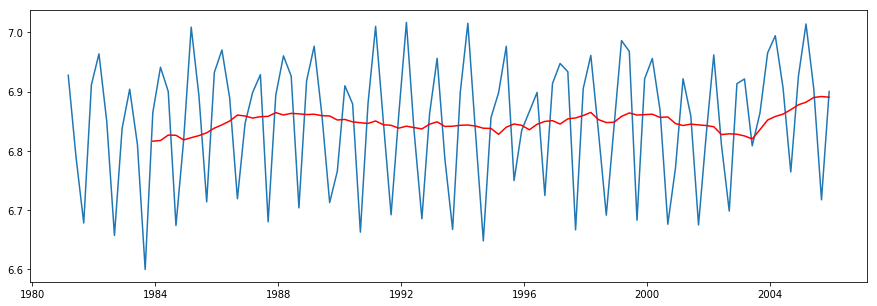

In [152]:
movingAverage = data_logScale.rolling(window=12).mean()
moveSTD = data_logScale.rolling(window=12).std()
plt.plot(data_logScale)
plt.plot(movingAverage, color='red')

## Remove Nan Values

In [37]:
datasetLogScaleMinusMovingAverage = data_logScale - moveAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Sales
1983-12-01,0.048467
1984-03-01,0.123673
1984-06-01,0.073732
1984-09-01,-0.152268
1984-12-01,-0.000601
1985-03-01,0.186548
1985-06-01,0.066817
1985-09-01,-0.116600
1985-12-01,0.094007
1986-03-01,0.126393


In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage, color='orange', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickey-Fuller test:
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(data['Sales'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

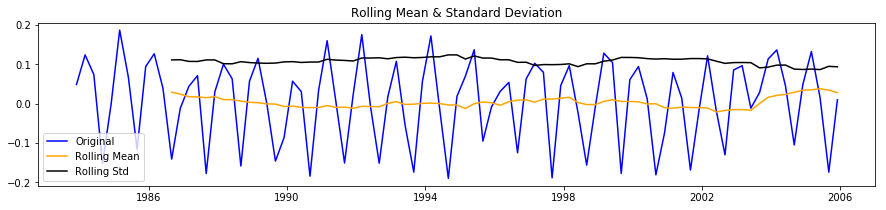

Result of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [39]:
test_stationarity(datasetLogScaleMinusMovingAverage)

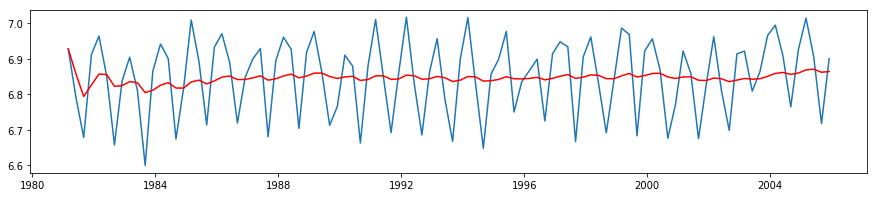

In [40]:
exponentialDecayWeightedAverage = data_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

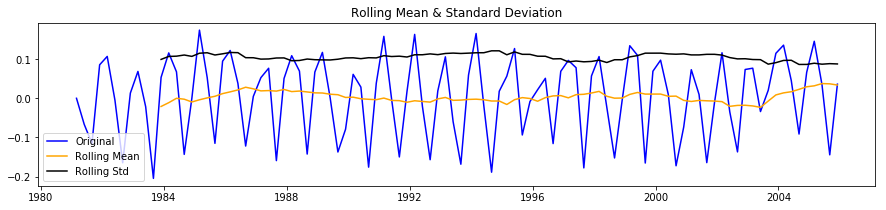

Result of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [41]:
datasetLogScaleMinusMovingExponentialDecayAverage = data_logScale -  exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

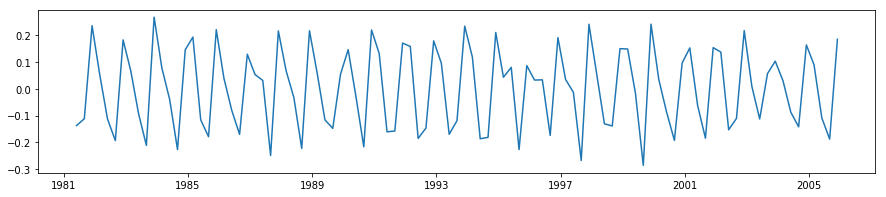

In [42]:
datasetLogDiffShifting = data_logScale - data_logScale.shift()
plt.plot(datasetLogDiffShifting)

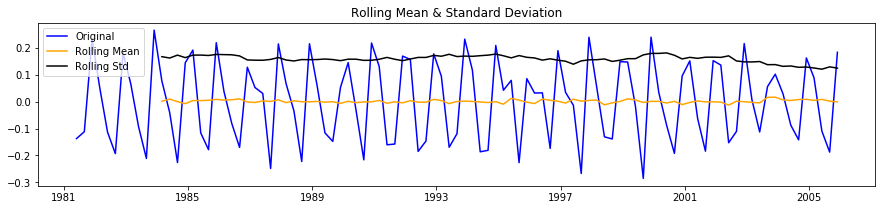

Result of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [43]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

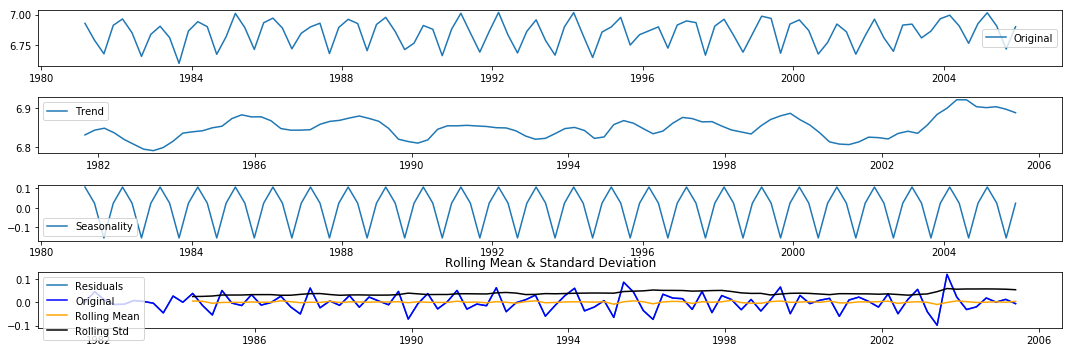

Result of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

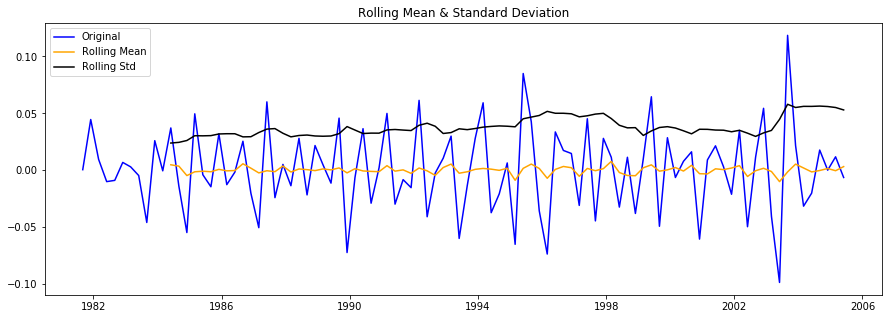

Result of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lag Used                       9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [48]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

## ACF and PACF Plots

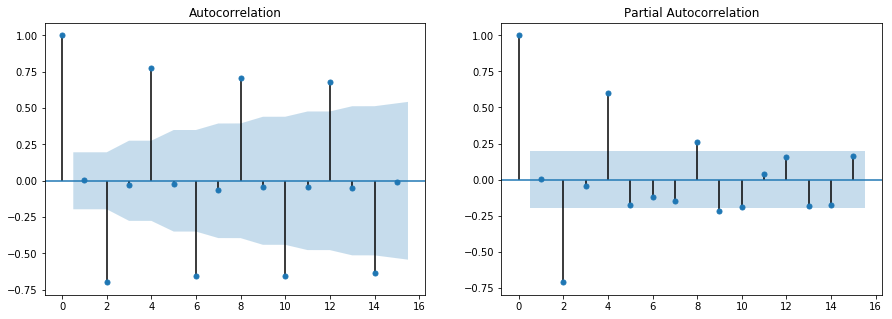

In [157]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure()
pyplot.subplot(121)
plot_acf(data, ax=pyplot.gca(),lags=15)
pyplot.subplot(122)
plot_pacf(data, ax=pyplot.gca(), lags=15)
pyplot.show()

## AR Model

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


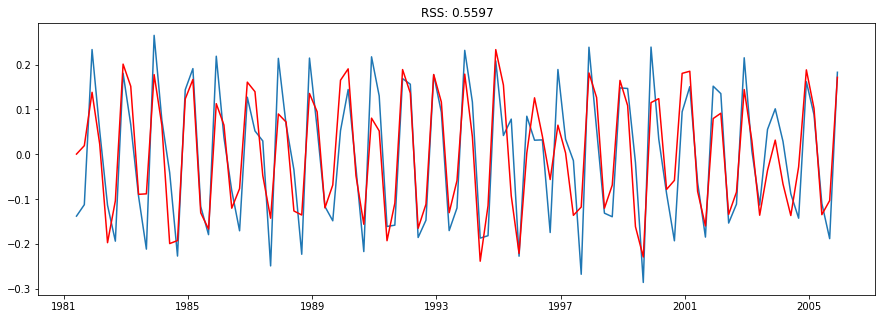

In [52]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Sales"])**2))
print('Plotting AR model')

# MA Model

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


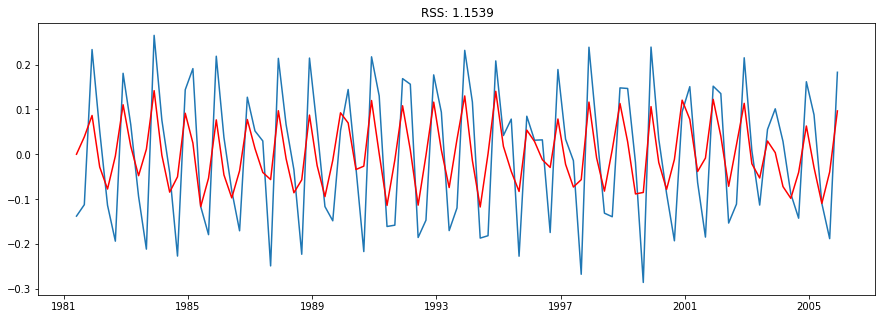

In [68]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Sales"])**2))
print('Plotting AR model')

## MODEL ARIMA

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: nan')

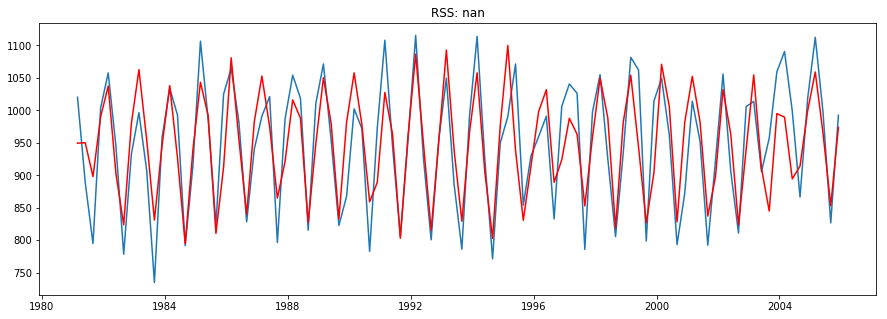

In [133]:
model = ARIMA(data, order=(4,0,0))
results_ARIMA = model.fit(disp=0)
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Sales"])**2))

In [134]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 0)   Log Likelihood                -543.024
Method:                       css-mle   S.D. of innovations             54.311
Date:                Thu, 05 Sep 2019   AIC                           1098.048
Time:                        16:05:05   BIC                           1113.679
Sample:                    03-01-1981   HQIC                          1104.374
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         949.4898      7.980    118.978      0.000     933.849     965.131
ar.L1.Sales     0.0164      0.078      0.208      0.835      -0.137       0.170
ar.L2.Sales    -0.2741      0.076     -3.584    

In [135]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1981-03-01     949.489816
1981-06-01     950.225920
1981-09-01     898.069975
1981-12-01     990.241216
1982-03-01    1037.377772
dtype: float64


## Convert to cumulative sum

In [136]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1981-03-01     949.489816
1981-06-01    1899.715736
1981-09-01    2797.785711
1981-12-01    3788.026927
1982-03-01    4825.404699
dtype: float64


In [137]:
predictions_ARIMA_log = pd.Series(data_logScale['Sales'].ix[0], index=data_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

1981-03-01     956.417570
1981-06-01    1906.643490
1981-09-01    2804.713465
1981-12-01    3794.954681
1982-03-01    4832.332453
dtype: float64

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


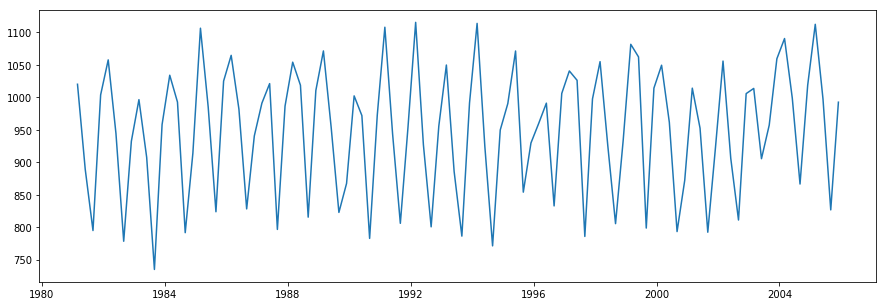

In [138]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

In [139]:
data_logScale

,Sales
1981-03-01,6.927754
1981-06-01,6.790322
1981-09-01,6.678342
1981-12-01,6.911648
1982-03-01,6.963852
1982-06-01,6.850550
1982-09-01,6.657369
1982-12-01,6.837869
1983-03-01,6.904249
1983-06-01,6.810914


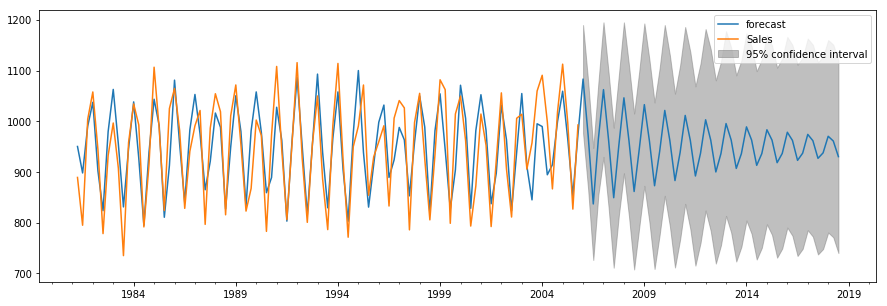

In [151]:
results_ARIMA.plot_predict(1,150)
x=results_ARIMA.forecast(steps=120)

In [141]:
len(x[1])

120

In [142]:
x[1]

array([54.31092626, 54.31818623, 56.31745699, 56.3386226 , 67.63812459,
       67.6639948 , 70.37457331, 70.41922723, 75.87005638, 75.91723577,
       78.39190621, 78.45495302, 81.64956331, 81.71452613, 83.69512806,
       83.77092722, 85.84263406, 85.91971463, 87.42224796, 87.50553443,
       88.92343299, 89.0070153 , 90.12022091, 90.20643257, 91.20454263,
       91.28990643, 92.10544963, 92.19089299, 92.90344455, 92.98697546,
       93.58083602, 93.66272696, 94.17462859, 94.25376517, 94.68443538,
       94.76084378, 95.12929267, 95.20237708, 95.51359376, 95.58332971,
       95.84833481, 95.91443828, 96.13851573, 96.20099096, 96.39114232,
       96.44989642, 96.61058775, 96.66567552, 96.80163798, 96.85308466,
       96.96780454, 97.01571199, 97.11250379, 97.15696903, 97.23845983,
       97.2796193 , 97.34817514, 97.3861669 , 97.44373217, 97.47871337,
       97.52699122, 97.55912015, 97.5995347 , 97.62897703, 97.66275722,
       97.6896773 , 97.71785864, 97.74242128, 97.76588971, 97.78

In [65]:
np.exp(x[1])

array([1.07580162, 1.07715478, 1.08023906, 1.08607369, 1.10730959,
       1.10896252, 1.10943224, 1.11305836, 1.12544123, 1.12732538,
       1.12732919, 1.13008393, 1.13827512, 1.14028619, 1.14041069,
       1.14272122, 1.14857433, 1.15063194, 1.15103871, 1.15309642,
       1.15753807, 1.15958913, 1.16028658, 1.16219004, 1.16573502,
       1.16774817, 1.16869172, 1.17049542, 1.17344833, 1.17540733,
       1.17654033, 1.17827552, 1.1808248 , 1.18272311, 1.18399299,
       1.18567795, 1.18794423, 1.18978112, 1.19114456, 1.19279009,
       1.19485282, 1.19663075, 1.19805427, 1.19966681, 1.20157956,
       1.20330252, 1.20476128, 1.20634473, 1.20814432, 1.20981693,
       1.21129299, 1.21284978, 1.21456201, 1.21618888, 1.21766964,
       1.21920137, 1.22084457, 1.22243004, 1.22390683, 1.22541465,
       1.22700205, 1.22855008, 1.2300171 , 1.23150196, 1.23304323,
       1.23455732, 1.23601082, 1.23747354, 1.23897587, 1.24045909,
       1.24189679, 1.24333814, 1.24480694, 1.24626197, 1.24768

## Accuracy Metrix

In [143]:
pred=np.exp(predictions_ARIMA_diff)

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [144]:
from sklearn.metrics import mean_absolute_error

#### Ukuran evaluasi dibawah ini adalah ukuran error untuk sebuah model, semakin kecil nilainya maka akan semakin baik model tersebut

In [149]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    me = np.mean(forecast - actual)             
    mae = np.mean(np.abs(forecast - actual))    
    mpe = np.mean((forecast - actual)/actual) 
    rmse = np.mean((forecast - actual)*2)*.5
    return({'ME':me, 'MAPE':mape, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse})

forecast_accuracy(results_ARIMA.fittedvalues, data['Sales'])

{'MAE': 45.318406926072946,
 'MAPE': 0.04785676679855448,
 'ME': -0.5737251172081449,
 'MPE': 0.0029926670229007456,
 'RMSE': -0.5737251172081449}

## Dapat dilihat diatas bahwa dengan nilai mape sebesar 0.04%, menandakan bahwa hasil prediksi untuk memprediksi periode selanjutnya hanya memiliki kesalahan yang relatif kecil

In [165]:
results_ARIMA.predict(1, 111)

1981-06-01     950.225920
1981-09-01     898.069975
1981-12-01     990.241216
1982-03-01    1037.377772
1982-06-01     902.282846
1982-09-01     823.694779
1982-12-01     979.437159
1983-03-01    1062.715812
1983-06-01     955.115497
1983-09-01     831.114987
1983-12-01     946.077209
1984-03-01    1038.115226
1984-06-01     926.992533
1984-09-01     795.016215
1984-12-01     938.684718
1985-03-01    1043.344982
1985-06-01     991.432979
1985-09-01     810.701449
1985-12-01     912.919268
1986-03-01    1080.998634
1986-06-01     954.989534
1986-09-01     839.746140
1986-12-01     982.871388
1987-03-01    1052.773252
1987-06-01     974.867435
1987-09-01     864.911899
1987-12-01     921.120405
1988-03-01    1016.165859
1988-06-01     988.097415
1988-09-01     827.251206
                 ...     
2001-09-01     837.331262
2001-12-01     897.346904
2002-03-01    1031.832421
2002-06-01     963.653927
2002-09-01     823.553821
2002-12-01     940.304382
2003-03-01    1054.588142
2003-06-01  

## Diatas ini merupakan hasil prediksi untuk periode selanjutnya